In [1]:
import os

In [22]:
MODEL_NAME = "ssd_mobnet"
PRETRAINED_MODEL_NAME = "ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8"
PRETRAINED_MODEL_URL = "http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz"
TF_RECORD_SCRIPT_NAME = "TF_RECORD_SCRIPT.py"
LABEL_MAP_NAME = 'label_map.pbtxt'

In [23]:
paths = {
    'WORKSPACE_PATH': os.path.join('Tensorflow', 'workspace'),
    'SCRIPTS_PATH': os.path.join('Tensorflow','scripts'),
    'APIMODEL_PATH': os.path.join('Tensorflow','models'),
    'ANNOTATION_PATH': os.path.join('Tensorflow', 'workspace','annotations'),
    'IMAGE_PATH': os.path.join('Tensorflow', 'workspace','images'),
    'MODEL_PATH': os.path.join('Tensorflow', 'workspace','models'),
    'PRETRAINED_MODEL_PATH': os.path.join('Tensorflow', 'workspace','pre-trained-models'),
    'CHECKPOINT_PATH': os.path.join('Tensorflow', 'workspace','models',MODEL_NAME), 
    'OUTPUT_PATH': os.path.join('Tensorflow', 'workspace','models',MODEL_NAME, 'export'), 
    'TFJS_PATH':os.path.join('Tensorflow', 'workspace','models',MODEL_NAME, 'tfjsexport'), 
    'TFLITE_PATH':os.path.join('Tensorflow', 'workspace','models',MODEL_NAME, 'tfliteexport'), 
    'PROTOC_PATH':os.path.join('Tensorflow','protoc')
 }

In [24]:
files = {
    "PIPELINE_CONFIG": os.path.join(
        "Tensorflow", "workspace", "models", MODEL_NAME, "pipeline.config"
    ),
    "TF_RECORD_SCRIPT": os.path.join(paths["SCRIPTS_PATH"], TF_RECORD_SCRIPT_NAME),
    "LABELMAP": os.path.join(paths["ANNOTATION_PATH"], LABEL_MAP_NAME),
}

In [25]:
for path in paths.values():
    if not os.path.exists(path):
        if os.name == 'posix':
            !mkdir -p {path}
        if os.name == 'nt':
            !mkdir {path}

### Downloading TensorFlow pretrained models from TF model zoo and intstall object detector

In [6]:
if os.name == 'nt':
    %pip install wget
    import wget

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\users\joonas\documents\github\object-detection\.venv\lib\site-packages\absl_py-2.1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\joonas\documents\github\object-detection\.venv\lib\site-packages\apache_beam-2.53.0-py3.11-win-amd64.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\joonas\documents\github\object-detection\.venv\lib\site-packages\avro_python3-1.10.2-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading e

In [ ]:
if not os.path.exists(os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection' )):
    !git clone https://github.com/tensorflow/models {paths['APIMODEL_PATH']}

In [ ]:
if os.name == 'posix':
    !apt-get install protobuf-compiler
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=.

if os.name =='nt':
    url="https://github.com/protocolbuffers/protobuf/releases/download/v3.15.6/protoc-3.15.6-win64.zip"
    wget.download(url)
    !move protoc-3.15.6-win64.zip {paths['PROTOC_PATH']}
    !cd {paths['PROTOC_PATH']} && tar -xf protoc-3.15.6-win64.zip
    os.environ['PATH'] += os.pathsep + os.path.abspath(os.path.join(paths['PROTOC_PATH'], 'bin'))   
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && copy object_detection\\packages\\tf2\\setup.py setup.py && python setup.py build && python setup.py install
    !cd Tensorflow/models/research/slim && pip install -e . 

In [58]:
VERIFICATION = os.path.join(
    paths["APIMODEL_PATH"],
    "research",
    "object_detection",
    "builders",
    "model_builder_tf2_test.py",
)
# Verify
!python {VERIFICATION}

Running tests under Python 3.11.2: c:\Users\Joonas\Documents\GitHub\Object-Detection\.venv\Scripts\python.exe
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_deepmac
2024-01-25 16:07:46.038921: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE SSE2 SSE3 SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
W0125 16:07:46.061913 16620 batch_normalization.py:1531] `tf.keras.layers.experimental.SyncBatchNormalization` endpoint is deprecated and will be removed in a future release. Please use `tf.keras.layers.BatchNormalization` with parameter `synchronized` set to True.
c:\Users\Joonas\Documents\GitHub\Object-Detection\.venv\Lib\site-packages\object_detection-0.1-py3.11.egg\object_detection\builders\model_builder.py:1112: DeprecationWarning: The 'warn' function is deprecated, use 'w

## This was installing missing libraries what verification script told was missing

- had to downgrade tensorflow to 2.13.0

In [57]:
#%pip install tensorflow --upgrade
#%pip uninstall protobuf -y
#%pip install protobuf==3.20.0
#%pip install cycler
#%pip install kiwisolver
#%pip install pyyaml
#%pip install tensorflow==2.13.0
%pip install protobuf==3.20.0
#%pip list



  Using cached protobuf-3.20.0-py2.py3-none-any.whl (162 kB)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.25.2
    Uninstalling protobuf-4.25.2:
      Successfully uninstalled protobuf-4.25.2


DEPRECATION: Loading egg at c:\users\joonas\documents\github\object-detection\.venv\lib\site-packages\absl_py-2.1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\joonas\documents\github\object-detection\.venv\lib\site-packages\apache_beam-2.53.0-py3.11-win-amd64.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\joonas\documents\github\object-detection\.venv\lib\site-packages\avro_python3-1.10.2-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading e

In [ ]:
import object_detection
%pip list

In [15]:
if os.name=='nt':
    wget.download(PRETRAINED_MODEL_URL)
    !move {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}

        1 file(s) moved.


x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/checkpoint
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.index
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/pipeline.config
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/saved_model.pb
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/variables.data-00000-of-00001
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/variables.index


In [17]:
labels = [
    {"name": "LetsRock", "id": 1},
    {"name": "Peace", "id": 2},
    {"name": "ThumbsUp", "id": 3},
    {"name": "ThumbsDown", "id": 4},
]

with open(files["LABELMAP"], "w") as f:
    for label in labels:
        f.write("item { \n")
        f.write("\tname: \"{}\"\n".format(label['name']))
        f.write("\tid:{}\n".format(label['id']))
        f.write("}\n")


In [ ]:
%pip install pytz

In [31]:
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'train')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'train.record')} 
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'test')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'test.record')} 


Successfully created the TFRecord file: Tensorflow\workspace\annotations\train.record


c:\Users\Joonas\Documents\GitHub\Object-Detection\Tensorflow\scripts\TF_RECORD_SCRIPT.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd



W0125 15:27:11.161694 10672 module_wrapper.py:149] From c:\Users\Joonas\Documents\GitHub\Object-Detection\Tensorflow\scripts\TF_RECORD_SCRIPT.py:122: The name tf.python_io.TFRecordWriter is deprecated. Please use tf.io.TFRecordWriter instead.


W0125 15:27:11.408482 10672 module_wrapper.py:149] From c:\Users\Joonas\Documents\GitHub\Object-Detection\Tensorflow\scripts\TF_RECORD_SCRIPT.py:80: The name tf.gfile.GFile is deprecated. Please use tf.io.gfile.GFile in

Successfully created the TFRecord file: Tensorflow\workspace\annotations\test.record


c:\Users\Joonas\Documents\GitHub\Object-Detection\Tensorflow\scripts\TF_RECORD_SCRIPT.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd



W0125 15:27:17.062314 33344 module_wrapper.py:149] From c:\Users\Joonas\Documents\GitHub\Object-Detection\Tensorflow\scripts\TF_RECORD_SCRIPT.py:122: The name tf.python_io.TFRecordWriter is deprecated. Please use tf.io.TFRecordWriter instead.


W0125 15:27:17.085350 33344 module_wrapper.py:149] From c:\Users\Joonas\Documents\GitHub\Object-Detection\Tensorflow\scripts\TF_RECORD_SCRIPT.py:80: The name tf.gfile.GFile is deprecated. Please use tf.io.gfile.GFile in

In [32]:
if os.name == 'nt':
    !copy {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}
    

        1 file(s) copied.


## Configuring pipeline file

In [46]:
import tensorflow as tf
from object_detection.utils import config_util
from object_detection.protos import pipeline_pb2
from google.protobuf import text_format

In [47]:
pipeline_config = pipeline_pb2.TrainEvalPipelineConfig()
with tf.io.gfile.GFile(files["PIPELINE_CONFIG"], "r") as f:
    proto_str = f.read()
    text_format.Merge(proto_str, pipeline_config)

In [48]:
pipeline_config.model.ssd.num_classes = len(labels)
pipeline_config.train_config.batch_size = 4
pipeline_config.train_config.fine_tune_checkpoint = os.path.join(
    paths["PRETRAINED_MODEL_PATH"], PRETRAINED_MODEL_NAME, "checkpoint", "ckpt-0"
)
pipeline_config.train_config.fine_tune_checkpoint_type = "detection"
pipeline_config.train_input_reader.label_map_path = files["LABELMAP"]
pipeline_config.train_input_reader.tf_record_input_reader.input_path[:] = [
    os.path.join(paths["ANNOTATION_PATH"], "train.record")
]
pipeline_config.eval_input_reader[0].label_map_path = files["LABELMAP"]
pipeline_config.eval_input_reader[0].tf_record_input_reader.input_path[:] = [
    os.path.join(paths["ANNOTATION_PATH"], "test.record")
]
config_text = text_format.MessageToString(pipeline_config)
with tf.io.gfile.GFile(files["PIPELINE_CONFIG"], "wb") as f:
    f.write(config_text)

In [49]:
config = config_util.get_configs_from_pipeline_file(files["PIPELINE_CONFIG"])
config  # to be sure that Tensorflow/workspace/models/pipeli.config file is correct now

{'model': ssd {
   num_classes: 4
   image_resizer {
     fixed_shape_resizer {
       height: 320
       width: 320
     }
   }
   feature_extractor {
     type: "ssd_mobilenet_v2_fpn_keras"
     depth_multiplier: 1.0
     min_depth: 16
     conv_hyperparams {
       regularizer {
         l2_regularizer {
           weight: 4e-05
         }
       }
       initializer {
         random_normal_initializer {
           mean: 0.0
           stddev: 0.01
         }
       }
       activation: RELU_6
       batch_norm {
         decay: 0.997
         scale: true
         epsilon: 0.001
       }
     }
     use_depthwise: true
     override_base_feature_extractor_hyperparams: true
     fpn {
       min_level: 3
       max_level: 7
       additional_layer_depth: 128
     }
   }
   box_coder {
     faster_rcnn_box_coder {
       y_scale: 10.0
       x_scale: 10.0
       height_scale: 5.0
       width_scale: 5.0
     }
   }
   matcher {
     argmax_matcher {
       matched_threshold: 0.5
    

### Starting to train the model

In [50]:
TRAINING_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'model_main_tf2.py')
command = "python {} --model_dir={} --pipeline_config_path={} --num_train_steps=5000".format(
    TRAINING_SCRIPT, paths["CHECKPOINT_PATH"], files["PIPELINE_CONFIG"]
)
print(command) #To be sure that command is correct before running it

python Tensorflow\models\research\object_detection\model_main_tf2.py --model_dir=Tensorflow\workspace\models\ssd_mobnet --pipeline_config_path=Tensorflow\workspace\models\ssd_mobnet\pipeline.config --num_train_steps=5000


In [ ]:
!{command}

### Model evaluation


In [59]:
command = (
    "python {} --model_dir={} --pipeline_config_path={} --checkpoint_dir={}".format(
        TRAINING_SCRIPT,
        paths["CHECKPOINT_PATH"],
        files["PIPELINE_CONFIG"],
        paths["CHECKPOINT_PATH"],
    )
)
print(command) # again to be sure that command is correct

python Tensorflow\models\research\object_detection\model_main_tf2.py --model_dir=Tensorflow\workspace\models\ssd_mobnet --pipeline_config_path=Tensorflow\workspace\models\ssd_mobnet\pipeline.config --checkpoint_dir=Tensorflow\workspace\models\ssd_mobnet


In [ ]:
!{command}

## Loading trained model from checkpoint

In [60]:
import os
import tensorflow as tf
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder
from object_detection.utils import config_util

In [61]:
configs = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])
detection_model = model_builder.build(model_config=configs['model'], is_training=False)

ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join(paths['CHECKPOINT_PATH'], 'ckpt-3')).expect_partial() # For running more trains check what is latest checkpoint

@tf.function
def detect_fn(image):
    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)
    return detections

###  Detecting object from image

In [69]:
import cv2
import numpy as np 
from matplotlib import pyplot
%matplotlib inline

In [78]:
category_index = label_map_util.create_category_index_from_labelmap(files["LABELMAP"])
IMAGE_PATH = os.path.join(
    paths["IMAGE_PATH"], "test", "peace.e04cf83a-badd-11ee-8bfe-48684a9cca7e.jpg"
)

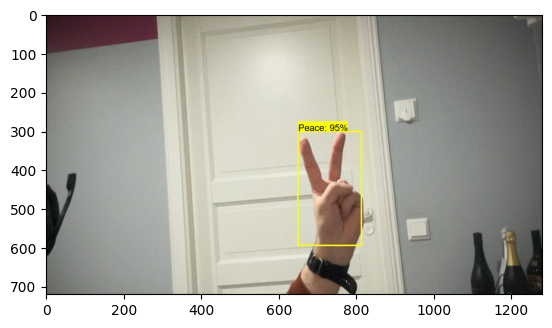

In [79]:
img = cv2.imread(IMAGE_PATH)
image_np = np.array(img)

input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
detections = detect_fn(input_tensor)

num_detections = int(detections.pop("num_detections"))
detections = {
    key: value[0, :num_detections].numpy() for key, value in detections.items()
}
detections["num_detections"] = num_detections
detections["detection_classes"] = detections["detection_classes"].astype(np.int64)

label_id_offset = 1
image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
    image_np_with_detections,
    detections["detection_boxes"],
    detections["detection_classes"] + label_id_offset,
    detections["detection_scores"],
    category_index,
    use_normalized_coordinates=True,
    max_boxes_to_draw=5,
    min_score_thresh=0.8,
    agnostic_mode=False,
)

pyplot.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
pyplot.show()

### Detecting obects from live cam

In [ ]:
cap = cv2.VideoCapture(0)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

while cap.isOpened():
    ret, frame = cap.read()
    image_np = np.array(frame)

    input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
    detections = detect_fn(input_tensor)

    num_detections = int(detections.pop("num_detections"))
    detections = {
        key: value[0, :num_detections].numpy()
        for key, value in detections.items()
    }
    detections["num_detections"] = num_detections
    detections['detection_classes'] = detections["detection_classes"].astype(np.int64)

    label_id_offset = 1
    image_np_with_detections = image_np.copy()

    viz_utils.visualize_boxes_and_labels_on_image_array(
        image_np_with_detections,
        detections["detection_boxes"],
        detections["detection_classes"] + label_id_offset,
        detections["detection_scores"],
        category_index,
        use_normalized_coordinates=True,
        max_boxes_to_draw=5,
        min_score_thresh=0.8,
        agnostic_mode=False,
    )
    cv2.imshow('object detection', cv2.resize(image_np_with_detections, (800, 600)))

    if cv2.waitKey(10) & 0xFF == ord('q'):
        cap.release()
        cv2.destroyAllWindows()
        break